In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# twiss parameter
def alpha(s):
    return -1/2*np.diff(beta(s), append=0)/np.diff(s, append=1)
def gamma(s):
    return (1+alpha(s)**2)/beta(s)

# phase advance
def psi(s):
    N = 100 # number of points for integrations
    z = np.linspace(1e-9, s, N, axis=1)
    return np.sum(1/beta(z), axis=1)*s/(N-1)

# particle position
def x(s, epsilon, phi):
    return np.sqrt(epsilon*beta(s))*np.cos(psi(s)+phi)

Parameters for visualisation

In [3]:
# tune
Q = 3.6

# longitudinal coordinate
S = np.linspace(0, 1, 1000)

# emittance
epsilon = 10

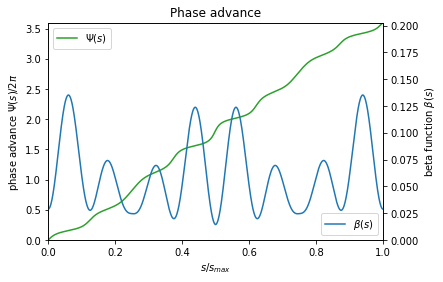

In [4]:
# beta function
beta = lambda s: A*(np.abs(np.cos(s*2*np.pi)*np.sin(4*s*2*np.pi)**2)*0.8 + np.abs(np.cos(s/2*2*np.pi))*0.1 + 0.1)  # beta function

# choose amplitude according to tune
A = 1
A = psi(np.array([max(S)]))/(Q*2*np.pi)


plt.title('Phase advance')
plt.xlabel('$s/s_{max}$')
plt.xlim(0, max(S))
plt.plot(S/max(S), psi(S)/2/np.pi, c='tab:green', label='$\\Psi(s)$')
plt.ylabel('phase advance $\\Psi(s) / 2\\pi$')
plt.ylim(0, Q)
plt.legend(loc='upper left')
plt.twinx().plot(S/max(S), beta(S), c='tab:blue', label='$\\beta(s)$')
plt.ylim(0, 1.5*max(beta(S)))
plt.ylabel('beta function $\\beta(s)$')
plt.legend(loc='lower right')

(-2.466831951758837, 2.466831951758837)

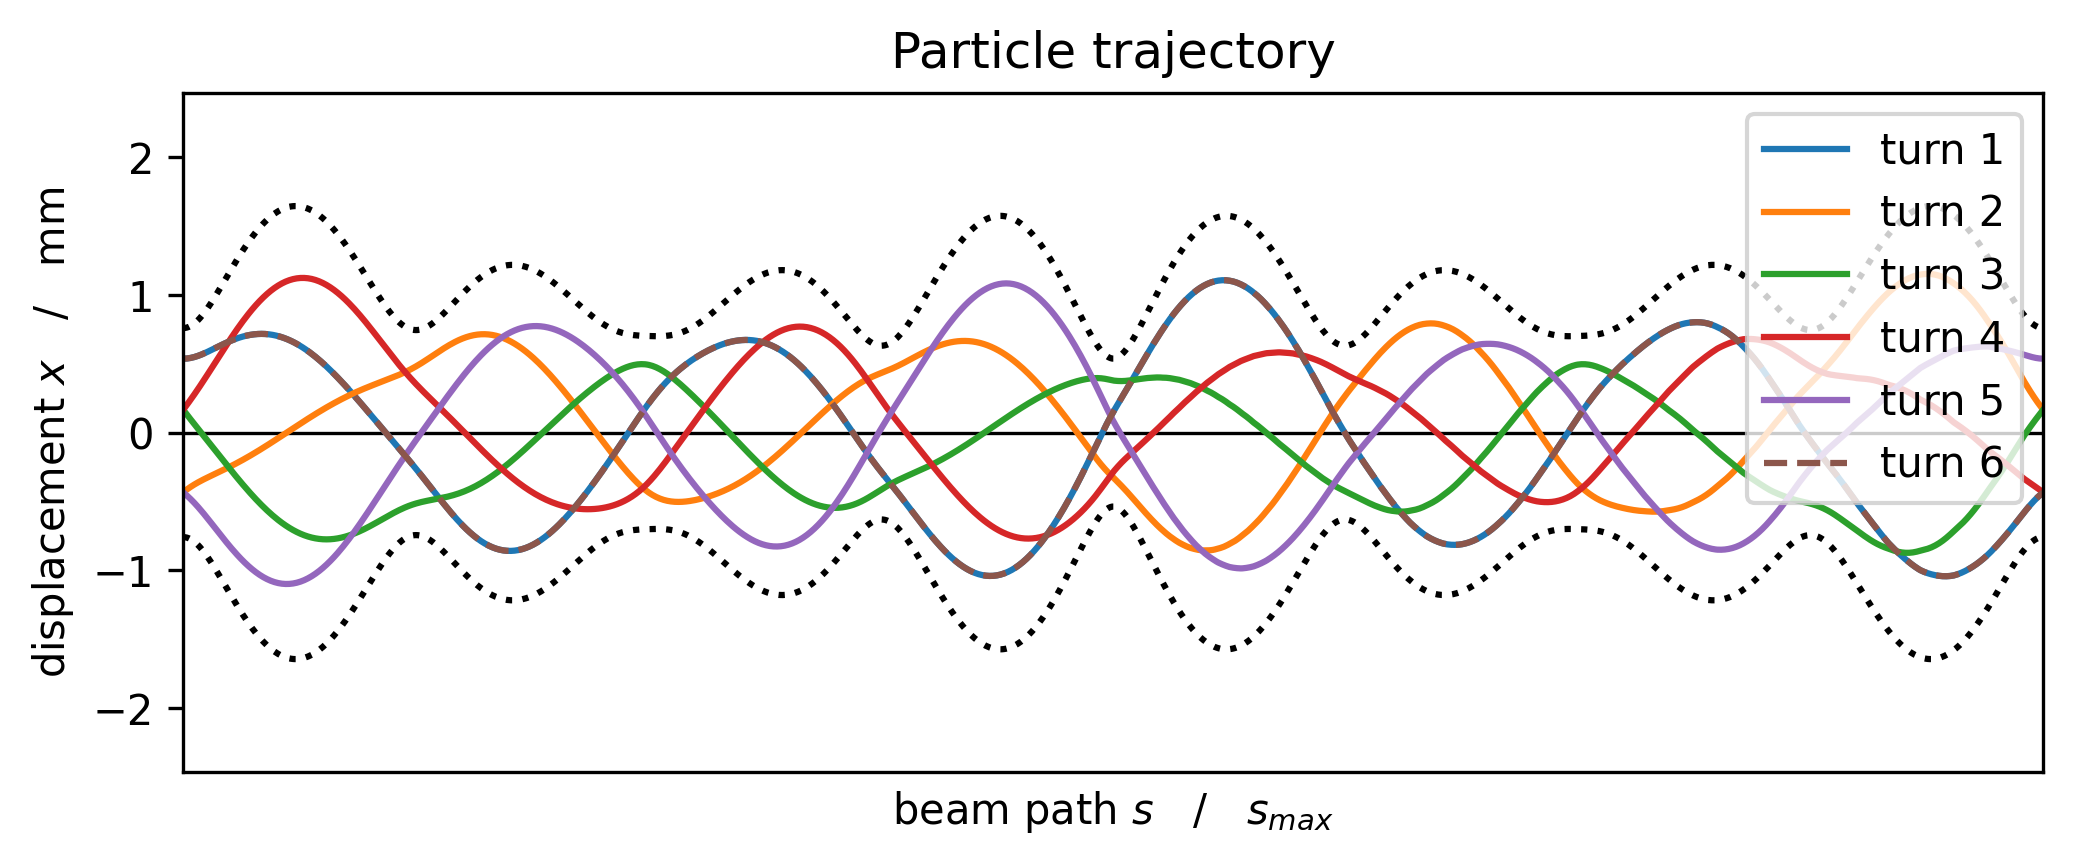

In [5]:
plt.figure(figsize=(8,3), dpi=300)
for i in range(6):
    plt.plot(S/max(S), x(S, epsilon, i*Q*2*np.pi), '-' if i < 5 else '--', label='turn %i'%(i+1))

E = np.sqrt(2*epsilon*beta(S))
plt.plot(S/max(S), E, 'k:')
plt.plot(S/max(S), -E, 'k:')

plt.title('Particle trajectory')
plt.legend()
plt.axhline(0, c='k', linestyle='-', linewidth=0.8, zorder=-100)
plt.xlabel('beam path $s$   /   $s_{max}$')
plt.xticks([])
plt.xlim(0, max(S))
plt.ylabel('displacement $x$   /   mm')
plt.ylim(-1.5*max(E),1.5*max(E))

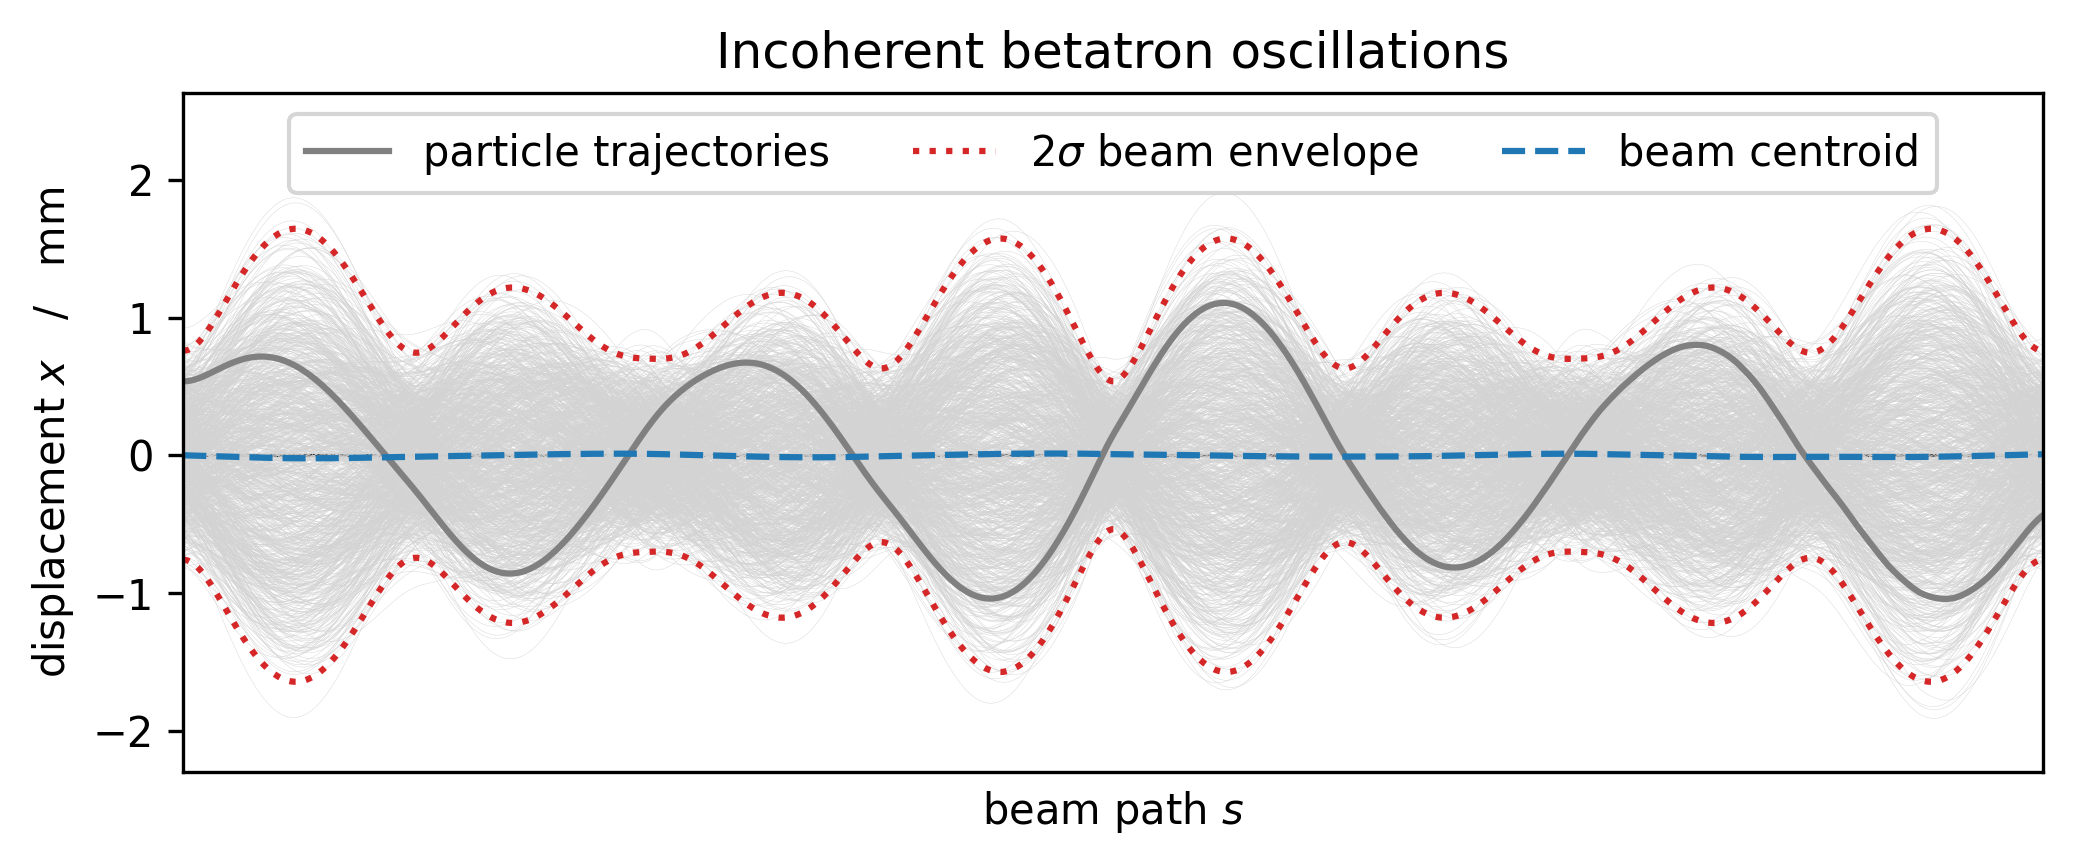

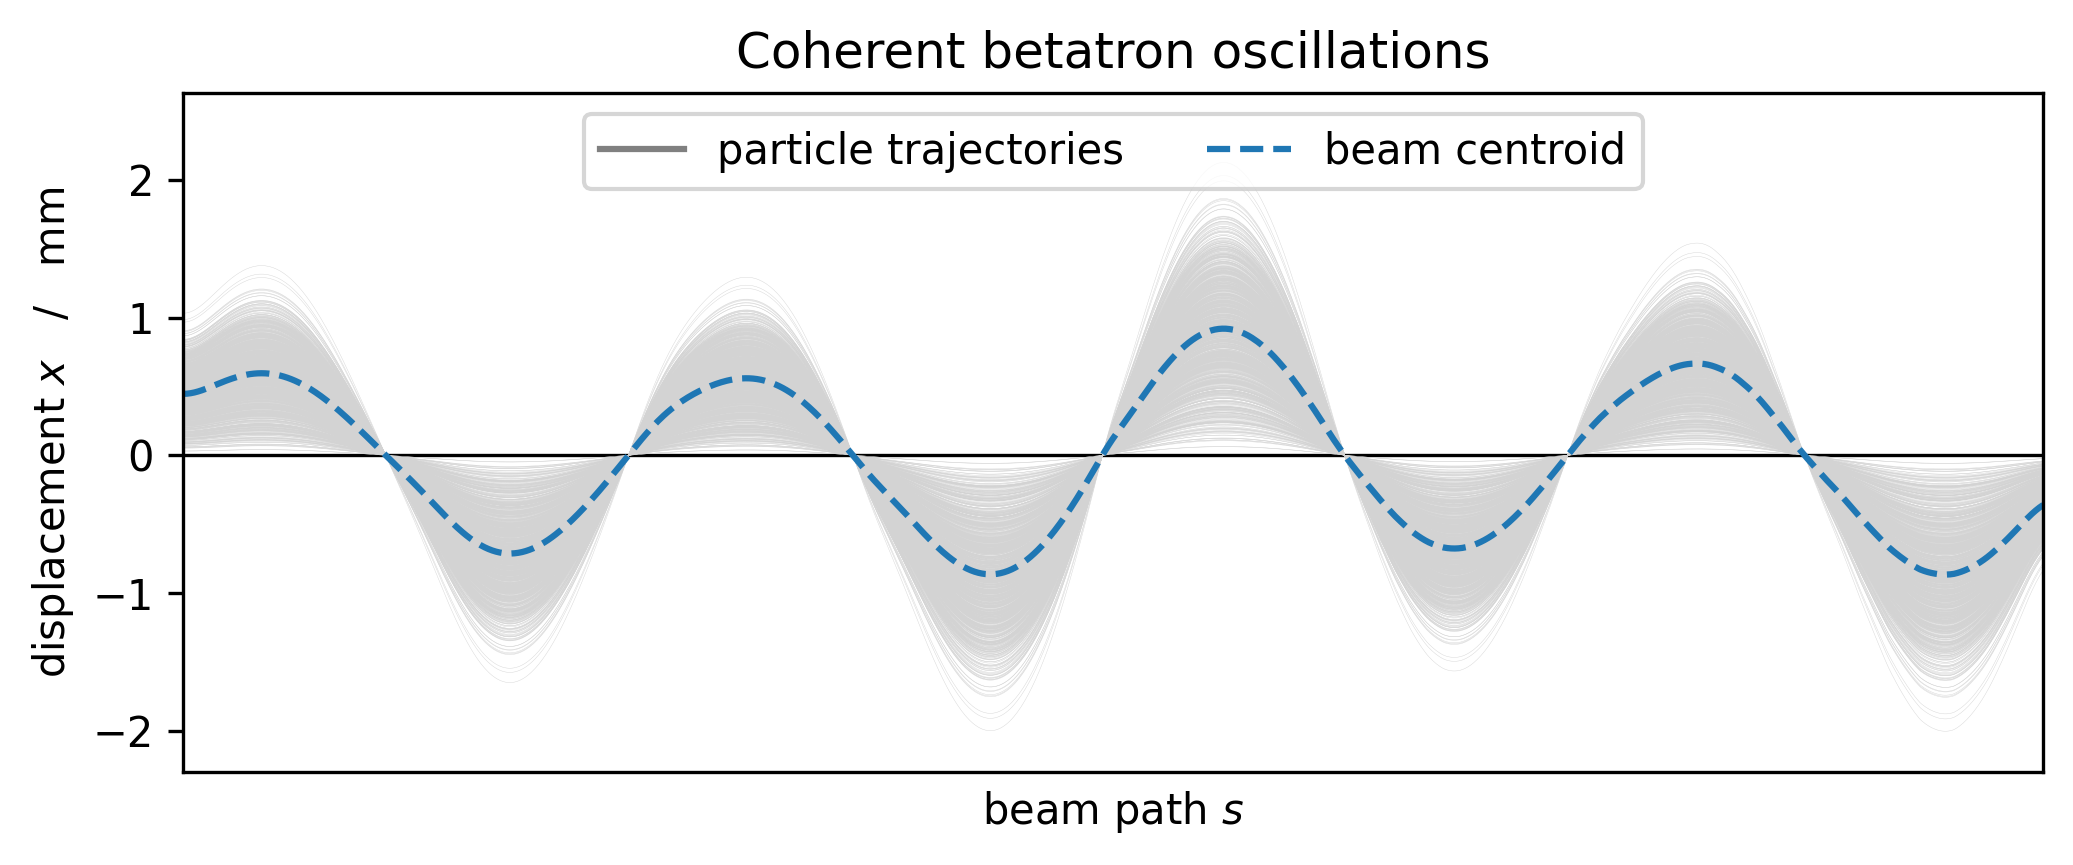

In [13]:
def plot(phaselock=False, turn=0, N=1000):
    fig, ax = plt.subplots(figsize=(8,3), dpi=300)

    X = np.zeros_like(S)
    
    # N particle trajectories
    np.random.seed(463791352)
    for i in range(N):
        phi = 2*np.pi*(turn*Q + (0 if phaselock else np.random.random()))
        e = np.abs(np.random.normal(0, epsilon))
        xx = x(S, e, phi)
        X += xx
        ax.plot(S, xx, c='lightgrey', linewidth=0.1, zorder=-1)
    ax.set_rasterization_zorder(0)

    # highlighted particle
    highline,  = ax.plot(S, x(S, epsilon, turn*Q*2*np.pi + 0), c='grey', label='particle trajectories')
    
    # envelope
    E = np.sqrt(2*epsilon*beta(S))
    if not phaselock:
        ax.plot(S, E, ':', c='tab:red', label='2$\sigma$ beam envelope')
        ax.plot(S, -E, ':', c='tab:red')

    # beam centroid
    ax.plot(S, X/N, '--', c='tab:blue', label='beam centroid')

    # plot layout
    ax.axhline(0, c='k', linestyle='-', linewidth=0.8, zorder=-100)
    ax.set_xlabel('beam path $s$')
    ax.set_xticks([])
    ax.set_xlim(0, max(S))
    ax.set_ylabel('displacement $x$   /   mm')
    ax.set_ylim(-1.4*max(E),1.6*max(E))
    ax.set_title(('Coherent ' if phaselock else 'Incoherent ')+'betatron oscillations')
    ax.legend(ncol=3, loc='upper center')
    
    if phaselock: highline.remove()
    #ax.text(0.97, 0.03, '$Q=%s$'%Q, c='darkgrey', transform=ax.transAxes, ha='right', va='bottom')
    
    # save
    #fig.savefig(('betatron_phaselocked%s.png' if phaselock else 'betatron%s.png')%('_%i'%turn if turn > 0 else ''))
    fig.savefig(('betatron_phaselocked%s.pdf' if phaselock else 'betatron%s.pdf')%('_%i'%turn if turn > 0 else ''))


plot()
plot(phaselock=True)

# 5 turns until pattern repeats (for tune .6)
#for turn in range(1, 5):
#    plot(turn=turn)
#    plot(phaselock=True, turn=turn)